In [200]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import ruptures as rpt
from functools import partial
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose

from bayesian_changepoint_detection.bayesian_changepoint_detection.priors import const_prior
import bayesian_changepoint_detection.bayesian_changepoint_detection.offline_likelihoods as offline_ll
from bayesian_changepoint_detection.bayesian_changepoint_detection.generate_data import generate_normal_time_series
from bayesian_changepoint_detection.bayesian_changepoint_detection.bayesian_models import offline_changepoint_detection

warnings.filterwarnings("ignore")

In [201]:
f = open("./KnowledgeGraphChangePointDetection/results/stream_FB15K-237_testdata1.txt", "r")
data = f.readlines()
prediction_error = np.array([float(err[:-2]) for err in data])

In [202]:
f = open("./KnowledgeGraphChangePointDetection/results/stream_FB15K-237_testdata2.txt", "r")
data2 = f.readlines()
prediction_error2 = np.array([float(err[:-2]) for err in data2])

In [203]:
f = open("./KnowledgeGraphChangePointDetection/results/stream_FB15K-237_testdata3.txt", "r")
data3 = f.readlines()
prediction_error3 = np.array([float(err[:-2]) for err in data3])

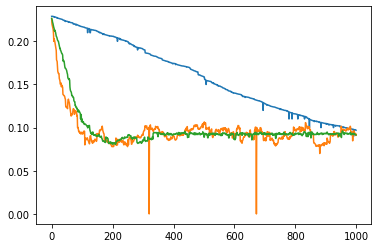

In [204]:
plt.plot(prediction_error)
plt.plot(prediction_error2)
plt.plot(prediction_error3)
plt.show()

In [205]:
"""
# generate signal
n_samples, dim, sigma = 1000, 1, 0.5
n_bkps = 2  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, bkps, result)
plt.show()
"""

'\n# generate signal\nn_samples, dim, sigma = 1000, 1, 0.5\nn_bkps = 2  # number of breakpoints\nsignal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)\n\n# detection\nalgo = rpt.Pelt(model="rbf").fit(signal)\nresult = algo.predict(pen=10)\n\n# display\nrpt.display(signal, bkps, result)\nplt.show()\n'

In [206]:
errors = [prediction_error, prediction_error2, prediction_error3]

### Pelt

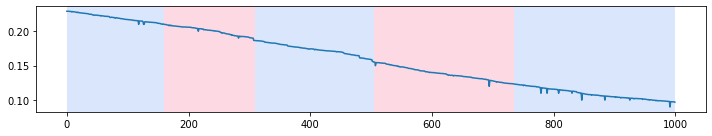

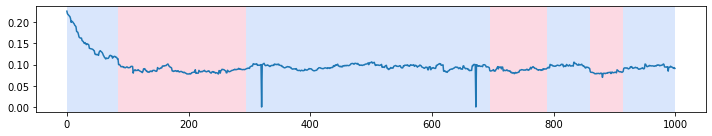

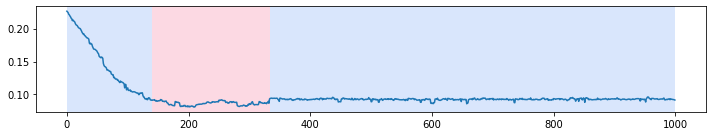

In [191]:
for e in errors:
    algo = rpt.Pelt(model="rbf").fit(e)
    result = algo.predict(pen=20)

    # display
    rpt.display(e, result)
    plt.show()

### Bayesian Offline Change Point

In [194]:
prior_function = partial(const_prior, p=1/(len(prediction_error) + 1))

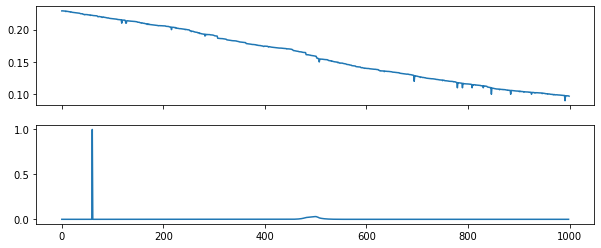

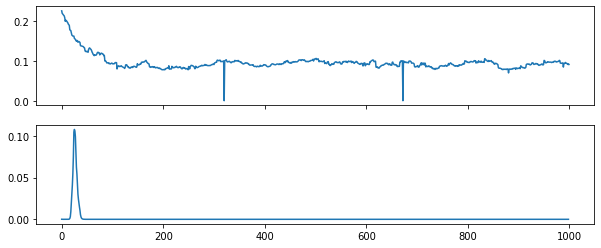

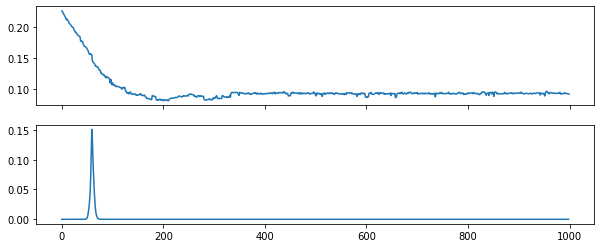

In [209]:
for e in errors:
    Q, P, Pcp = offline_changepoint_detection(e, prior_function ,offline_ll.StudentT(),truncate=-40)
    
    fig, ax = plt.subplots(2, figsize=[10, 4], sharex=True)
    ax[0].plot(e[:])
    ax[1].plot(np.exp(Pcp).sum(0))
    plt.show()

### Error Threshold

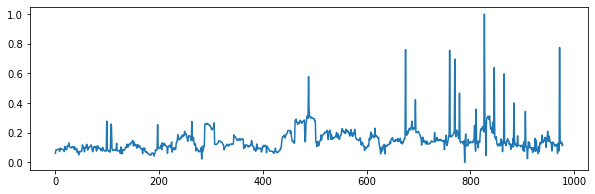

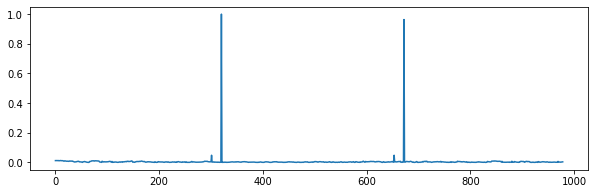

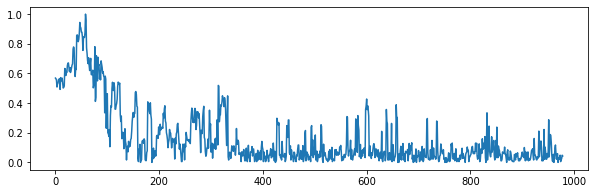

In [235]:
window_size = 20
for i, e in enumerate(errors):
    change_rate_array = []
    for i in range(0, len(e) - window_size - 1):
        window = []
        for j in range(i, i + window_size):
            window.append(e[j])
        # change_rate = abs(min(window) - max(window)) / min(window)
        change_rate = abs(window[0] - window[-1]) / (window[0] + 0.005)
        change_rate_array.append(change_rate)
        
    norm_change_rate_array = (change_rate_array - min(change_rate_array)) / (max(change_rate_array) - min(change_rate_array))
    plt.figure(figsize=(10, 3))
    plt.plot(norm_change_rate_array)
    plt.show()

### ARIMA

In [243]:
"""
# Read the AirPassengers dataset
airline = pd.read_csv('AirPassengers.csv', index_col ='Month', parse_dates = True)
  
# Print the first five rows of the dataset
airline.head()

result = seasonal_decompose(pd.DataFrame(prediction_error), model ='multiplicative')
  
# ETS plot 
result.plot()
plt.show()

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
stepwise_fit.summary()

# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['#Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

# Calculate root mean squared error
rmse(test["#Passengers"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["#Passengers"], predictions)
"""

'\n# Read the AirPassengers dataset\nairline = pd.read_csv(\'AirPassengers.csv\', index_col =\'Month\', parse_dates = True)\n  \n# Print the first five rows of the dataset\nairline.head()\n\nresult = seasonal_decompose(pd.DataFrame(prediction_error), model =\'multiplicative\')\n  \n# ETS plot \nresult.plot()\nplt.show()\n\n# Fit auto_arima function to AirPassengers dataset\nstepwise_fit = auto_arima(airline[\'#Passengers\'], start_p = 1, start_q = 1,\n                          max_p = 3, max_q = 3, m = 12,\n                          start_P = 0, seasonal = True,\n                          d = None, D = 1, trace = True,\n                          error_action =\'ignore\',   # we don\'t want to know if an order does not work\n                          suppress_warnings = True,  # we don\'t want convergence warnings\n                          stepwise = True)           # set to stepwise\n  \nstepwise_fit.summary()\n\n# Split data into train / test sets\ntrain = airline.iloc[:len(airline)-